# Trabajo Práctico 1:  Algoritmo de Maximización de la Esperanza

**Profesor**: Saúl Calderón Ramírez

**Estudiantes**:

* Ricardo Chacon
* Marco Ferraro
* Gabriel Valentine


In [1]:
import pandas as pd

df = pd.read_csv('./data/pima-indians-diabetes.csv', header=None)

df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
TARGET_COLUMN = 8

In [3]:


# TODO: #2 Fix variables names in graph functions
import matplotlib.pyplot as plt


def graph_histogram(df, column, target_column, column_tag="Name"):
  
  target_0 = df[df[target_column] == 0]
  target_1 = df[df[target_column] == 1]

  plt.hist(target_0[column], bins=20, alpha=0.5, label='Target 0', color='blue')
  plt.hist(target_1[column], bins=20, alpha=0.5, label='Target 1', color='red')

  plt.xlabel('Data Column')
  plt.ylabel('Frequency')
  plt.legend()
  plt.title('Histograms for Target 0 and Target 1')
  plt.show()

  return None

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

def graph_normal_curve(df, column, target_column, column_tag="Name"):
    target_0 = df[df[target_column] == 0]
    target_1 = df[df[target_column] == 1]

    mu_0, std_0 = norm.fit(target_0[column])
    mu_1, std_1 = norm.fit(target_1[column])

    x = np.linspace(min(df[column]) - 3 * std_0, max(df[column]) + 3 * std_1, 100)
    pdf_0 = norm.pdf(x, mu_0, std_0)
    pdf_1 = norm.pdf(x, mu_1, std_1)

    plt.plot(x, pdf_0, label='Target 0 (Normal Curve)', color='blue')
    plt.plot(x, pdf_1, label='Target 1 (Normal Curve)', color='red')

    plt.fill_between(x, 0, pdf_0, alpha=0.2, color='blue')
    plt.fill_between(x, 0, pdf_1, alpha=0.2, color='red')

    plt.xlabel(column_tag)
    plt.ylabel('Probability Density')
    plt.legend()
    plt.title(f'Filled Normal Curves for Target 0 and Target 1 ({column_tag})')
    plt.show()

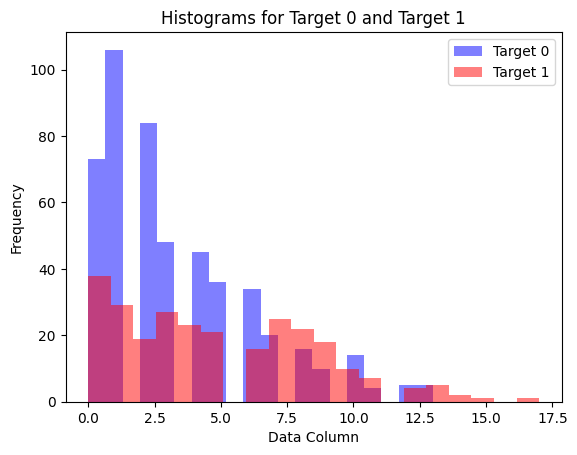

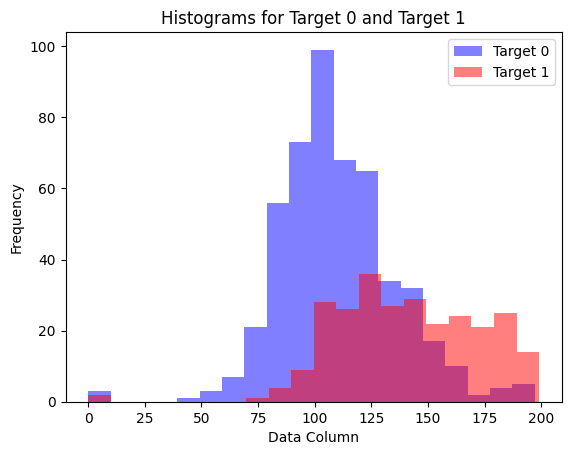

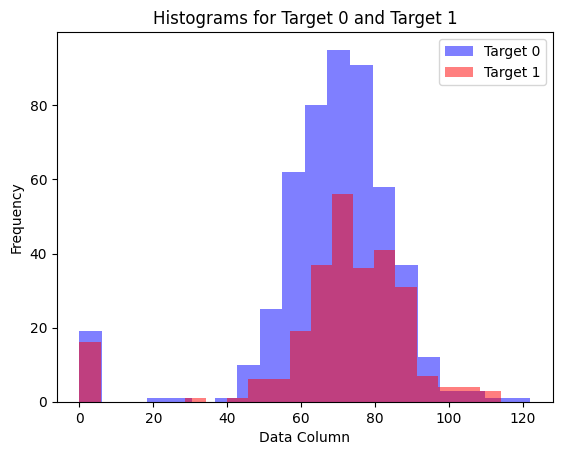

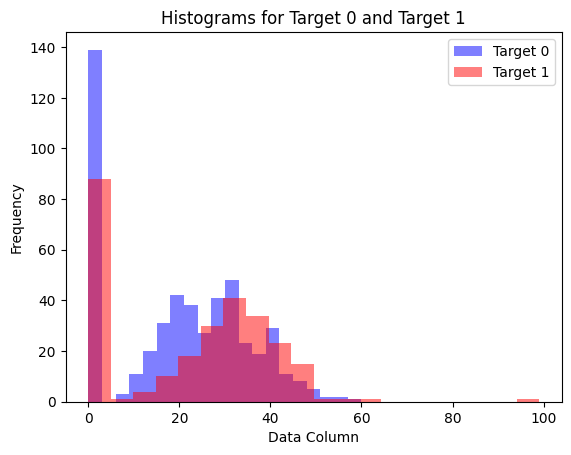

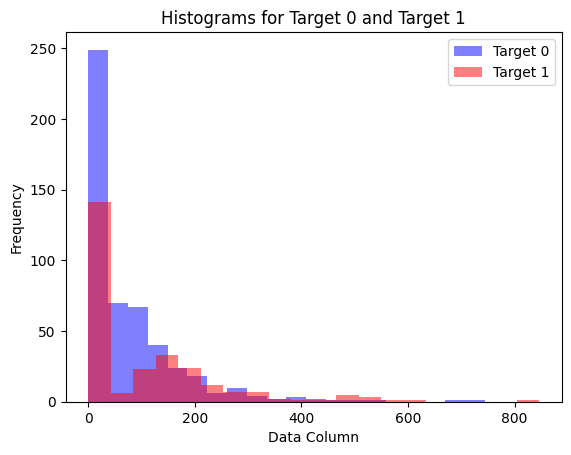

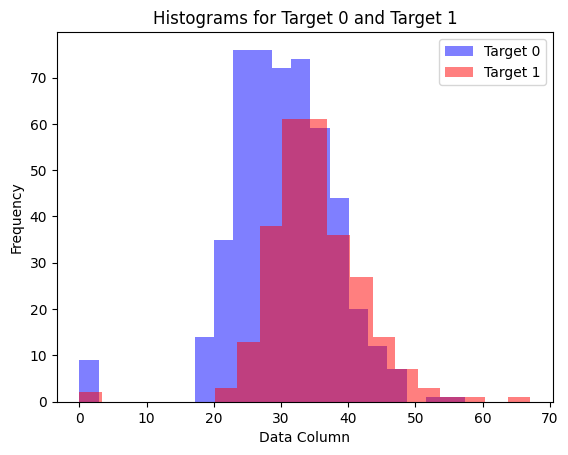

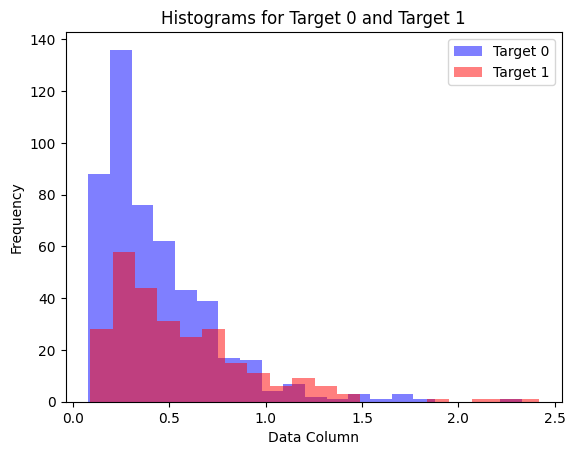

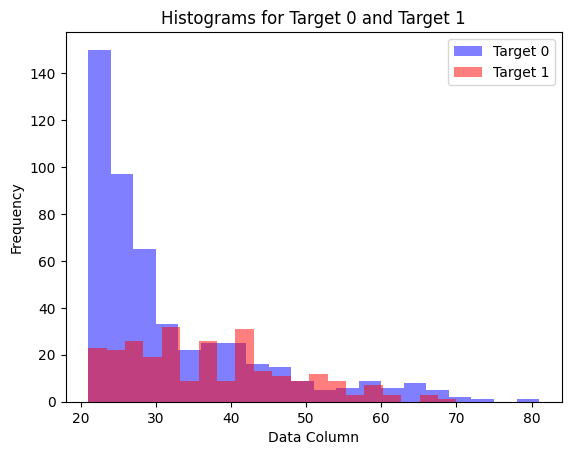

In [5]:
for feature in range(8):

    graph_histogram(df, feature, target_column=TARGET_COLUMN, column_tag=f"Feature {feature}")
    print("\n")

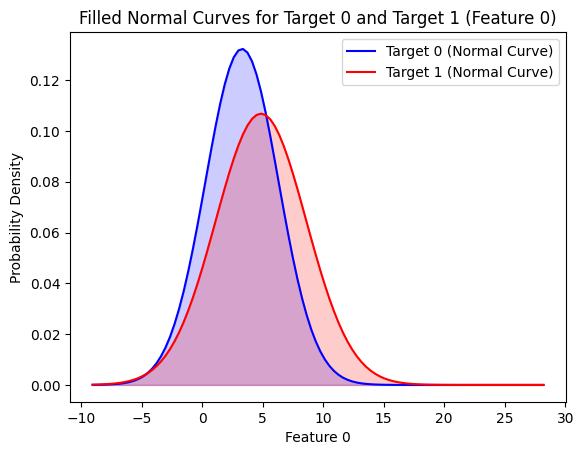

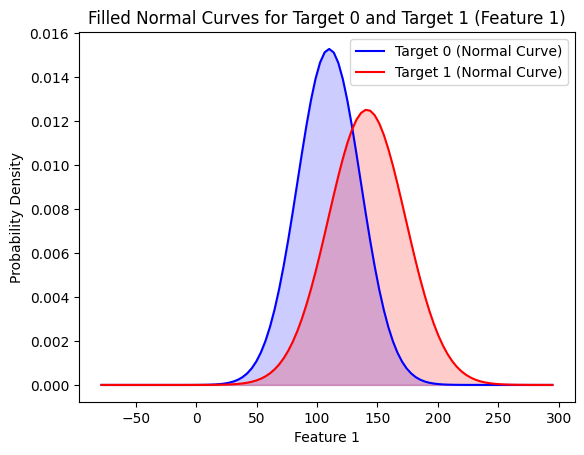

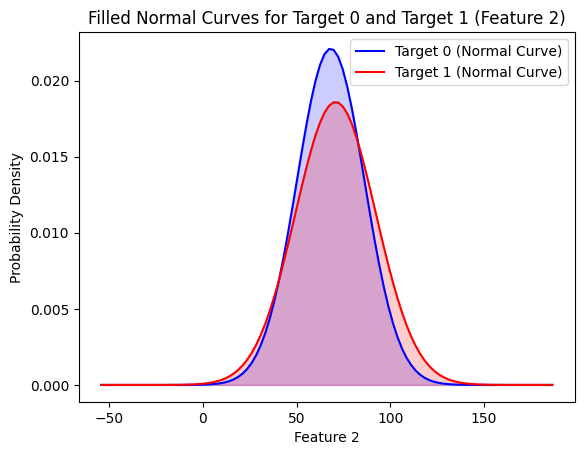

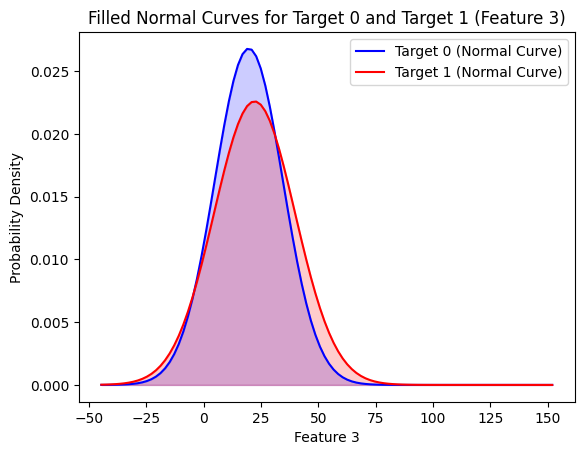

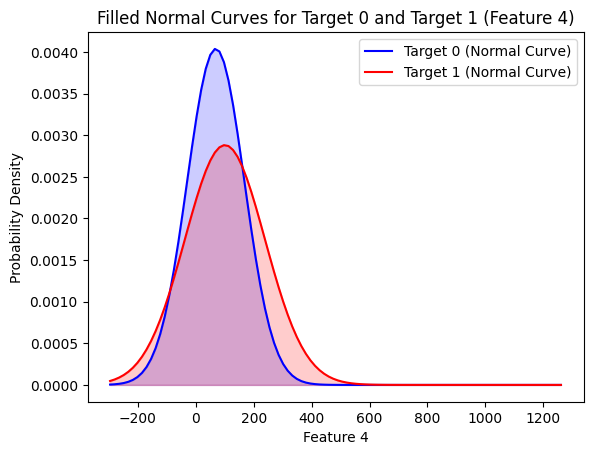

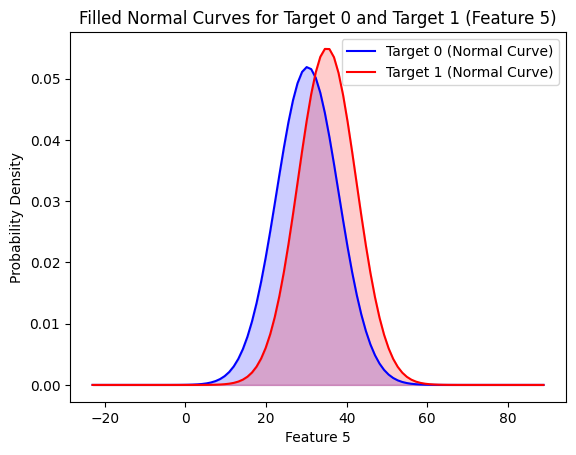

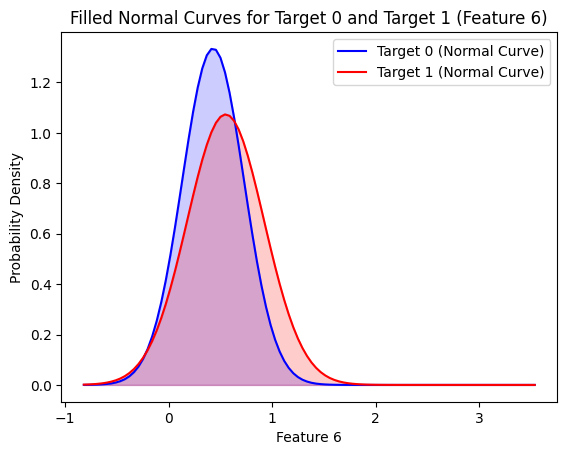

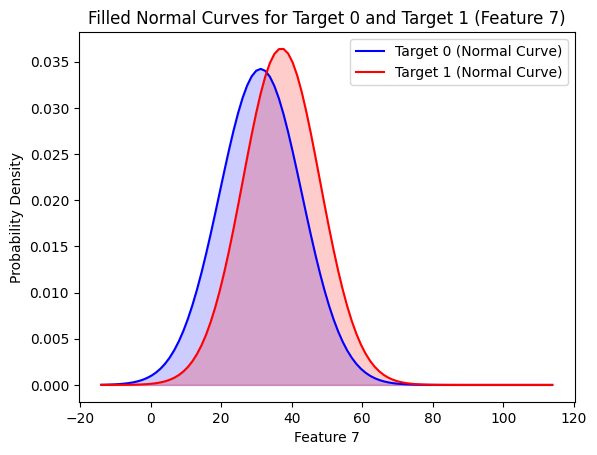

In [6]:
for feature in range(8):

    graph_normal_curve(df, feature, target_column=TARGET_COLUMN, column_tag=f"Feature {feature}")
    print("\n")

In [7]:

import numpy as np

def calculate_density_pair(df, column, target_column):

    target_0 = df[df[target_column] == 0]
    target_1 = df[df[target_column] == 1]

    hist_0, __ = np.histogram(target_0[column], bins=20, density=True)
    hist_1, __ = np.histogram(target_1[column], bins=20, density=True)

    return (np.mean(hist_0), np.mean(hist_1))

In [8]:
def calculate_density_pairs(df, target_column):

  density_pairs = []

  for column in df.columns:
    if column != target_column:
      density_pairs.append(calculate_density_pair(df, column, target_column))

  return density_pairs

In [9]:
calculate_density_pairs(df, target_column=TARGET_COLUMN)

[(0.07692307692307693, 0.058823529411764705),
 (0.005076142131979695, 0.005025125628140704),
 (0.008196721311475412, 0.008771929824561405),
 (0.01666666666666667, 0.0101010101010101),
 (0.0013440860215053762, 0.001182033096926714),
 (0.017452006980802796, 0.014903129657228018),
 (0.444247001332741, 0.4288164665523156),
 (0.016666666666666666, 0.02040816326530612)]